# Project :- Insurance Forecast Stat Mini Project

**Content**

**Columns**

**age:** age of primary beneficiary

**sex:** insurance contractor gender, female, male

**bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children:** Number of children covered by health insurance / Number of dependents

**smoker:** Smoking

**region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges:** Individual medical costs billed by health insurance

**Acknowledgements**
The dataset is available on GitHub here.

**Inspiration**
Can you accurately predict insurance costs?

Data Description:

Context:

Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

Learning Outcomes:

     Exploratory Data Analysis
     Practicing statistics using Python
     Hypothesis testing
Objective:

We want to see if we can dive deep into this data to find some valuable insights.

Steps and tasks:

Import the necessary libraries (2 marks)

Read the data as a data frame (2 marks)

Perform basic EDA which should include the following and print out your insights at every step. (28 marks)

a. Shape of the data (2 marks)

b. Data type of each attribute (2 marks)

c. Checking the presence of missing values (3 marks)

d. 5 point summary of numerical attributes (3 marks)

e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks)

f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)

g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)

h. Distribution of categorical columns (include children) (4 marks)

i. Pair plot that includes all the columns of the data frame (4 marks) 4. Answer the following questions with statistical evidence (28 marks)

a. Do charges of people who smoke differ significantly from the people who don't? (7 marks)

b. Does bmi of males differ significantly from that of females? (7 marks)

c. Is the proportion of smokers significantly different in different genders? (7

marks)

d. Is the distribution of bmi across women with no children, one child and two children, the same? (7 marks)

---

**Import the necessary libraries (2 marks)**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import skew, stats
from math import sqrt
from numpy import mean, var

**Read the data as a data frame (2 marks)**

In [5]:
data = pd.read_csv("insurance.csv")# importing the dataset

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Perform basic EDA which should include the following and print out your insights at every step. (28 marks)**

**a. Shape of the data (2 marks)**

In [7]:
data.shape

(1338, 7)

**b. Data type of each attribute (2 marks)**

In [8]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**c. Checking the presence of missing values (3 marks)**

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**d. 5 point summary of numerical attributes (3 marks)**

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks)**

## Distribution of 'bmi', 'age', and 'charges'  Columns

In [11]:
# Select only bmi, age and charges columns
DistData = data.loc[:, ['age','bmi','charges']]
DistData.head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026A8A2907B8>,
      dtype=object)

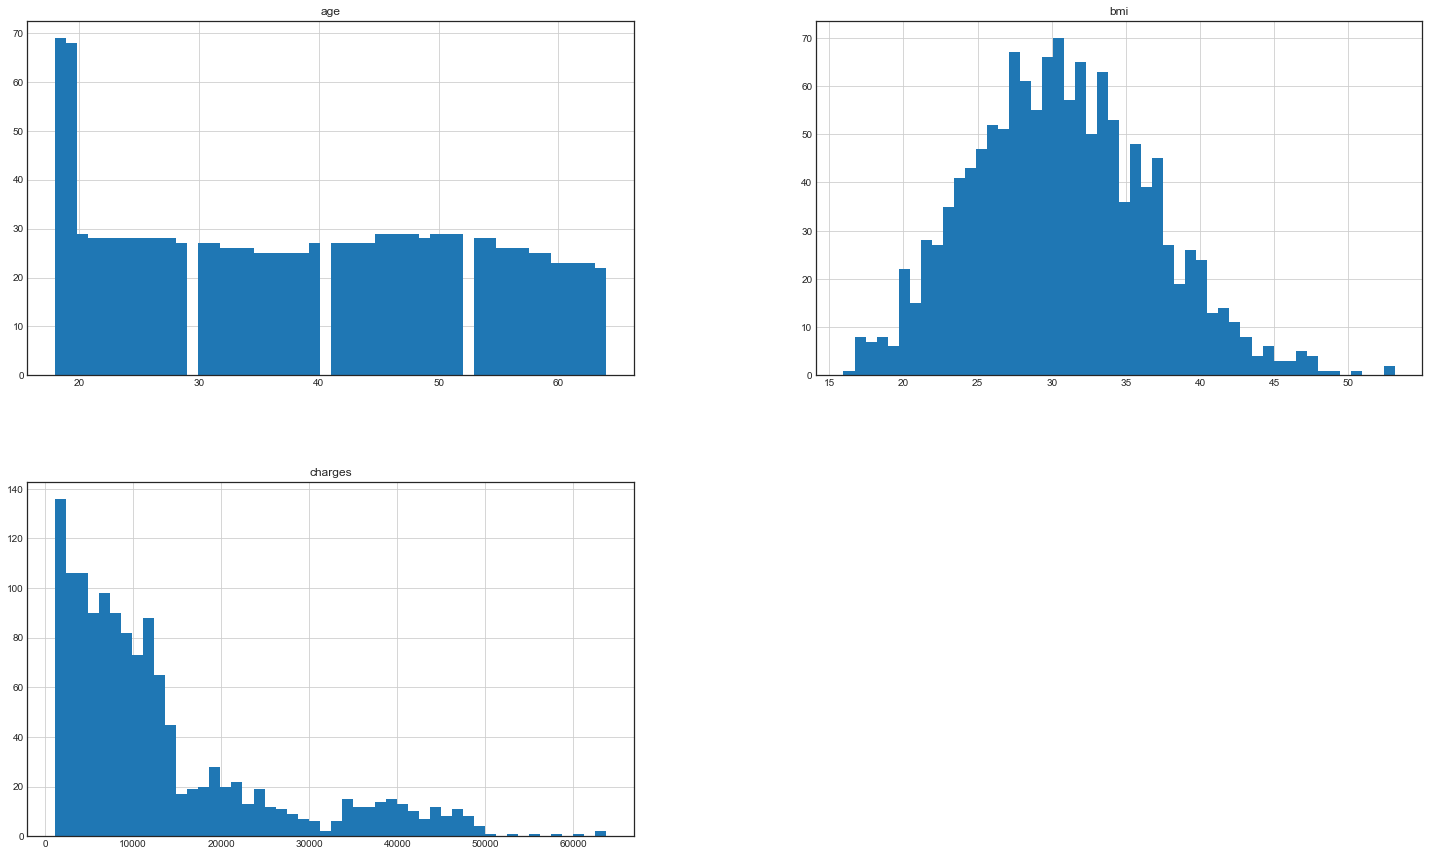

In [12]:
# Lets see Distribution through Histogram
plt.style.use('seaborn-white')
DistData.hist(bins=50, figsize=(25,15), grid=True)


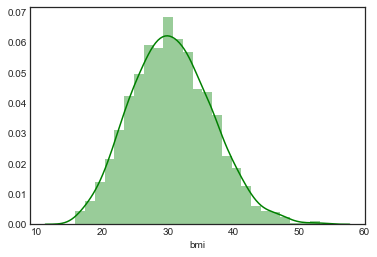

In [13]:
sns.distplot(DistData['bmi'], color='green')

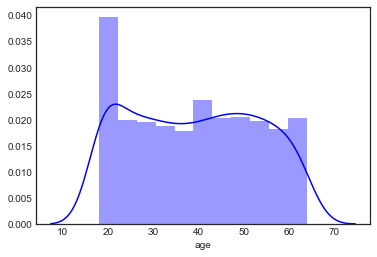

In [14]:
sns.distplot(DistData['age'], color='blue')

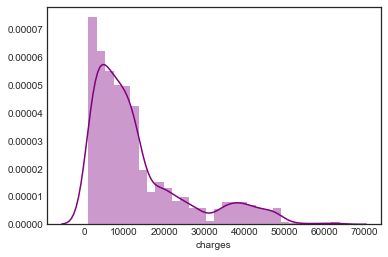

In [15]:
sns.distplot(DistData['charges'], color='purple')

**f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)**

In [16]:
DistData.skew()

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

**g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)**

### Checking outliers in 'bmi,'age' and 'charges' columns
### Checking outliers using the Z-Score

In [17]:
DistData.shape

(1338, 3)

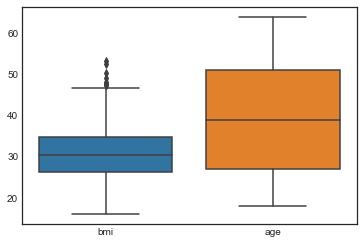

In [18]:
sns.boxplot(data=DistData.loc[:,['bmi','age']])

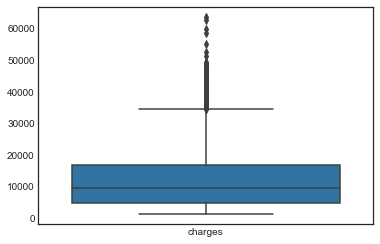

In [19]:
sns.boxplot(data=DistData.loc[:,['charges']])

Without Outlier

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

You must be wondering that, how does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero.

These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers. You can relate this to the concept of central limit theorem.

We will use Z-score function defined in scipy library to detect the outliers.

In [20]:
from scipy import stats
z = np.abs(stats.zscore(DistData))
print(z)

[[1.43876426 0.45332    0.2985838 ]
 [1.50996545 0.5096211  0.95368917]
 [0.79795355 0.38330685 0.72867467]
 ...
 [1.50996545 1.0148781  0.96159623]
 [1.29636188 0.79781341 0.93036151]
 [1.55168573 0.26138796 1.31105347]]


Looking the code and the output above, it is difficult to say which data point is an outlier. 
Let’s try and define a threshold to identify an outlier.

In [21]:
threshold = 3
print(np.where(z > 3)) # 11 observations are having Z score more than the threshold value

(array([  34,  116,  543,  577,  819,  847, 1047, 1146, 1230, 1300, 1317],
      dtype=int64), array([2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1], dtype=int64))


Don’t be confused by the results. The first array contains the list of row numbers and second array respective column numbers, 
which mean z[34][2] have a Z-score higher than 3.

In [22]:
DistData_WithoutOutlier= DistData[(z < 3).all(axis=1)] #removing the outlier

In [23]:
DistData.shape

(1338, 3)

In [24]:
DistData_WithoutOutlier.shape

(1327, 3)

#Distribution of categorical columns (include children) (4 marks)

In [25]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
ds=data.copy()
ds.drop(["charges",'age','bmi'],axis=1,inplace=True)
print('                          ')
print(ds.head())
print('-----------'*4)
print('Orinal Dataset')
print(data.head())

                          
      sex  children smoker     region
0  female         0    yes  southwest
1    male         1     no  southeast
2    male         3     no  southeast
3    male         0     no  northwest
4    male         0     no  northwest
--------------------------------------------
Orinal Dataset
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [27]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [28]:
ds['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

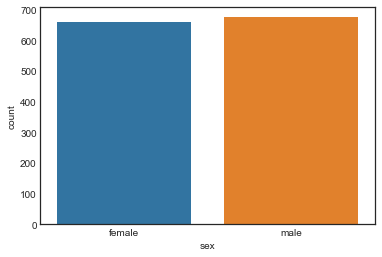

In [29]:
sns.countplot(x='sex',data=ds)

In [30]:
ds['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

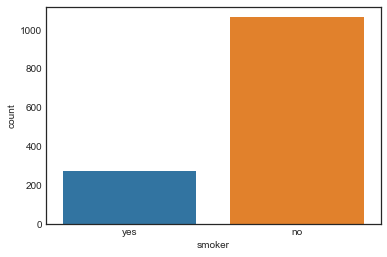

In [31]:
sns.countplot(x='smoker',data=ds)

In [32]:
ds['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

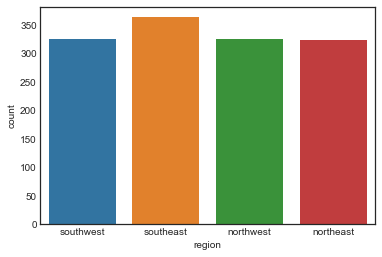

In [33]:
sns.countplot(x='region',data=ds)

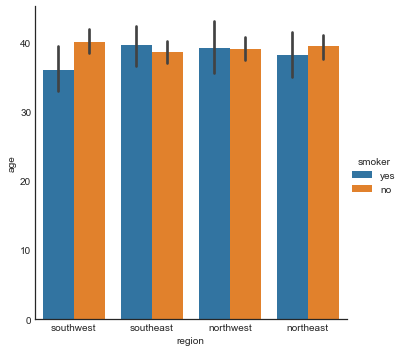

In [34]:
#Distribution of categorical columns by region and age

sns.catplot(x="region",y="age",hue="smoker",data=data,kind="bar")

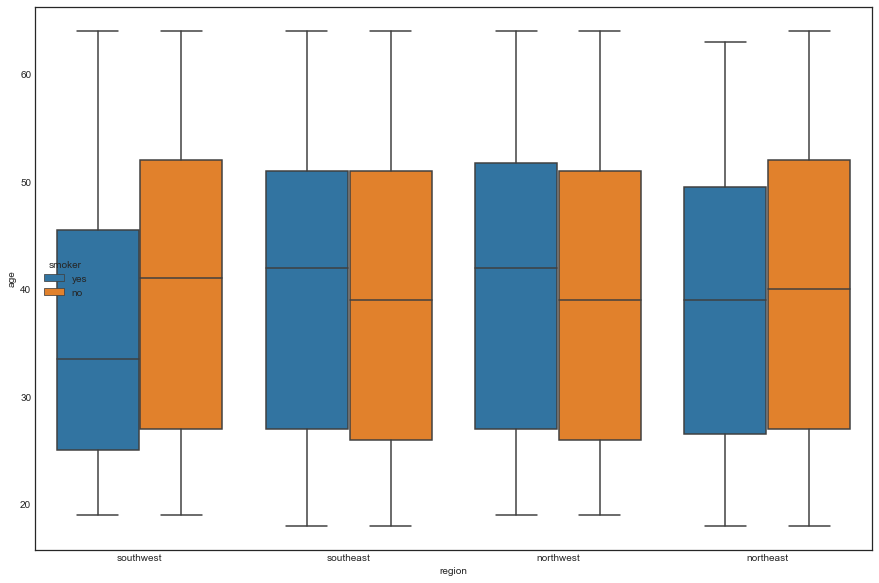

In [35]:
plt.figure(figsize=(15, 10))

sns.boxplot(x="region",y="age",hue="smoker",data=data)

## Pair plot that includes all the columns of the data frame (4 marks)

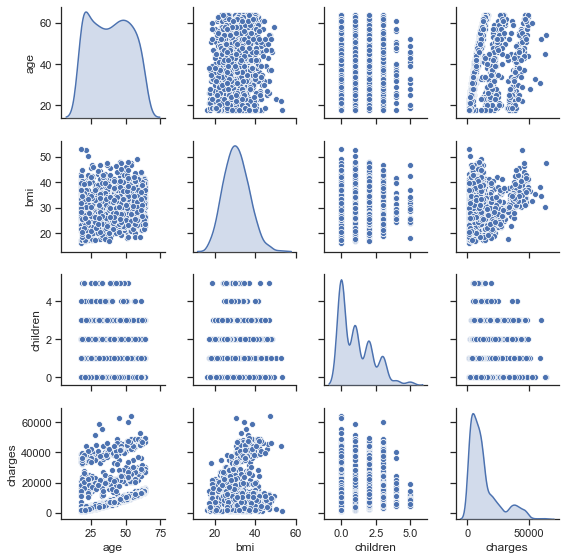

In [36]:
sns.set(style="ticks", color_codes=False)

g = sns.pairplot(data,height=2,diag_kind='kde')

In [37]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
# Replacing string values to numbers
data['sex'] = data['sex'].apply({'male':0, 'female':1}.get) 
data['smoker'] = data['smoker'].apply({'yes':1, 'no':0}.get)
data['region'] = data['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

---

**4. Answer the following questions with statistical evidence (28 marks)**

a. Do charges of people who smoke differ significantly from the people who don't? (7 marks)

Hypothesis

Null Hypothesis:

Charges of people who smoke differ significantly from people who don't

Alternative Hypothesis:

Charges of people who smoke does not differ significantly from people who don't


Text(0.5, 1.0, 'Overall distribution of charges comparing smokers and non-smokers')

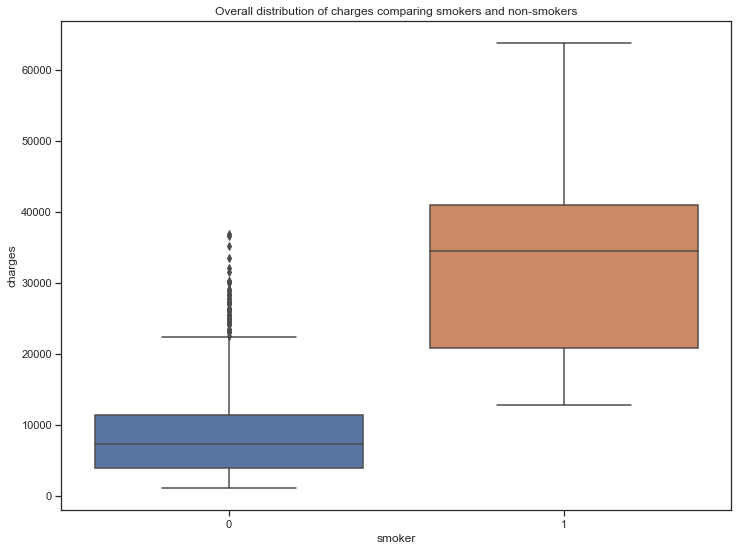

In [39]:
#boxplot showing the distribution of charges of smokers and non-smokers
plt.figure(figsize=(12,9))
sns.boxplot(x='smoker',y='charges',data=data)
plt.title("Overall distribution of charges comparing smokers and non-smokers")

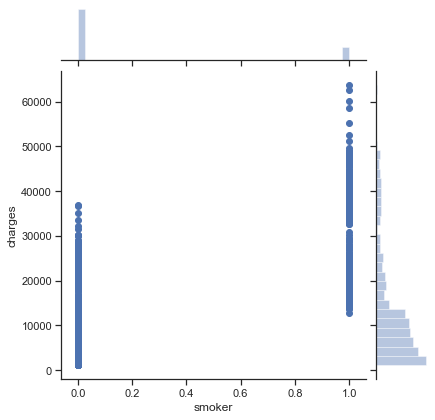

In [40]:
# Also confirming with a joinplot
# Correlation betweeen 'charges' and 'smoker' 
sns.jointplot(x=data['smoker'],y=data['charges'])

In [41]:
smoker_ = data[data['smoker']==1]
non_smoker = data[data['smoker']==0]

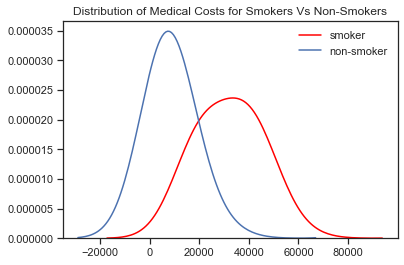

In [42]:
plt.title('Distribution of Medical Costs for Smokers Vs Non-Smokers')
ax = sns.kdeplot(smoker_['charges'], bw=10000, label='smoker', color='r')
ax = sns.kdeplot(non_smoker['charges'], bw=10000, label='non-smoker')
plt.show()

In [43]:
#Computing the P-Value with 0.05 confidence level.

statistic, pvalue = stats.ttest_ind(non_smoker['charges'], smoker_['charges'], equal_var = False)
print("2 sample and 2 sided t-test t-stat:  {} and pvalue: {} respectively".format(statistic,pvalue))

2 sample and 2 sided t-test t-stat:  -32.751887766341824 and pvalue: 5.88946444671698e-103 respectively


In [44]:
# #Explore the cohen function


# # function to calculate Cohen's d for independent samples
# def cohend(d1, d2):
#     n1, n2 = len(d1), len(d2)
#     s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
#     s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
#     u1, u2 = mean(d1), mean(d2)
#     return (u1 - u2) / s

# d = cohend(smoker_['charges'], non_smoker['charges'])
# print("cohen's d:  {}".format(d))

#As can be seen from the above demonstrations, the p-value is computed as 5.88946444671698e-103, 
#which is significantly smaller than the 0.05% confidence level. Also, Cohen's D indicates that the difference between the means is more than 3 standard deviations which is large enough. 


### From the above distributions, we can conclude that the charges of people who smoke differ significantly from people who don't and therefore we fail to reject our null hypothesis

In [45]:
smoker_.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,1,16884.9240
11,62,1,26.29,0,1,2,27808.7251
14,27,0,42.13,0,1,2,39611.7577
19,30,0,35.30,0,1,1,36837.4670
23,34,1,31.92,1,1,4,37701.8768


---

b. Does bmi of males differ significantly from that of females? (7 marks)

**Hypothesis**

**Null Hypothesis:**

bmi of males differ significantly from that of females

**Alternative Hypothesis:**

bmi of males does not differ significantly from that of females

Text(0.5, 1.0, 'Overall distribution of bmi of males and females')

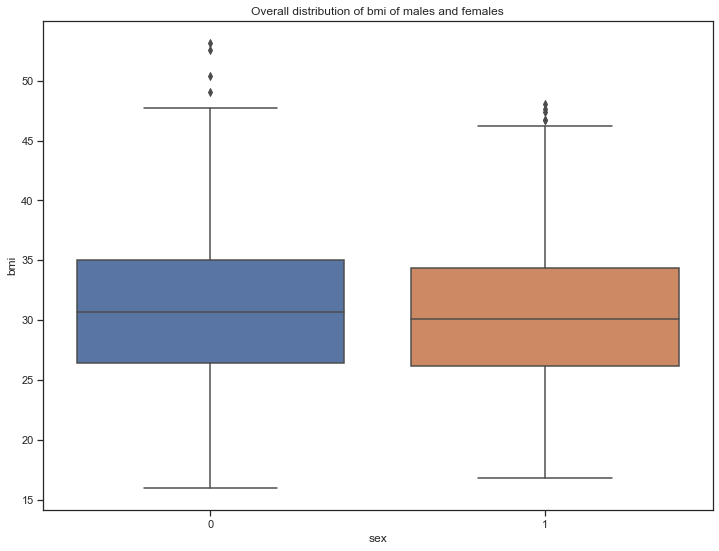

In [47]:
#boxplot showing the distribution of bmi of males and females
plt.figure(figsize=(12,9))
sns.boxplot(x='sex',y='bmi',data=data)
plt.title("Overall distribution of bmi of males and females")

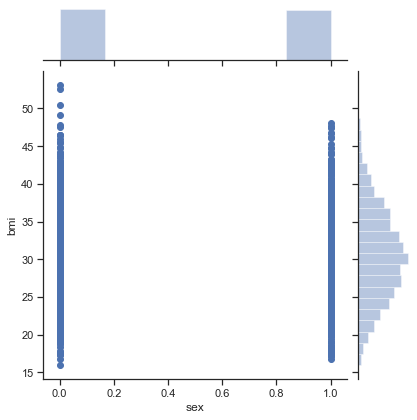

In [48]:
# Also confirming with a joinplot
# Correlation betweeen 'bmi' and 'sex' 
sns.jointplot(x=data['sex'],y=data['bmi'])

In [64]:
male_ = data[data['smoker']==1]
female = data[data['smoker']==0]

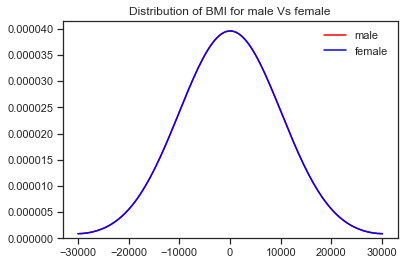

In [66]:
plt.title('Distribution of BMI for male Vs female')
ax = sns.kdeplot(male_['bmi'], bw=10000, label='male', color='r')
ax = sns.kdeplot(female['bmi'], bw=10000, label='female', color='b')
plt.show()

In [67]:
statistic, pvalue = stats.ttest_ind(data['sex'], data['bmi'], equal_var = False)
print("2 sample and 2 sided t-test t-stat:  {} and pvalue: {} ".format(statistic,pvalue))

2 sample and 2 sided t-test t-stat:  -180.3545295513222 and pvalue: 0.0 



As can be seen from the above demonstrations, the p-value is computed as 0.0 , which is significantly smaller than the 0.05% confidence level. Therefore, we can conclude that the bmi of males differ significantly from bmi of females and therefore we fail to reject our null hypothesis

---

**c. Is the proportion of smokers significantly different in different genders? (7 marks)**

**Hypothesis**

**Null Hypothesis:**

proportion of smokers significantly different in different genders

**Alternative Hypothesis:**

proportion of smokers does not significantly different in different genders

In [68]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [69]:
data.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [75]:
female_smokers=(data['sex']==1) & (data['smoker']==1)
female_smokers.head()

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [76]:
female_smokers.value_counts()

False    1223
True      115
dtype: int64

In [77]:
male_smokers=(data['sex']==0) & (data['smoker']==1)
male_smokers.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [78]:
male_smokers.value_counts()

False    1179
True      159
dtype: int64

In [79]:
#proportion of females who smoke
115/1338*100

8.594917787742899

In [80]:
#proportion of males who smoke
159/1338*100

11.883408071748878

From the above demonstration, the proportion of females who smoke are 8.59% while the proportion of males who smoke are 11.88% (3.29% differece) which indicates that the proportion of smokers is significantly different in different genders and we therefore fail to reject our null hypothesis.

---

d. Is the distribution of bmi across women with no children, one child and two children, the same? (7 marks)

**Hypothesis**

**Null Hypothesis:**

distribution of bmi across women with no children, one child and two children, the same

**Alternative Hypothesis:**

distribution of bmi across women with no children, one child and two children, not the same

In [81]:
data_=data[data['children']<3]
data_.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
5,31,1,25.740,0,0,2,3756.62160


Text(0.5, 1.0, 'Overall distribution of bmi of females having lessthan 3 childred')

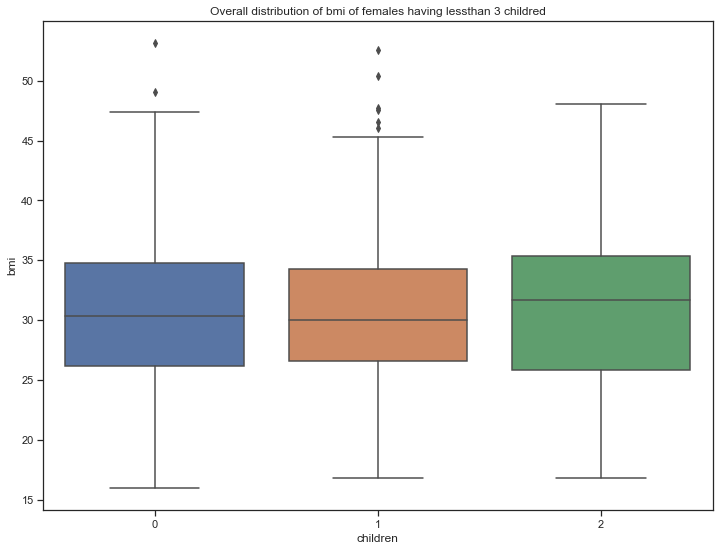

In [83]:
#boxplot showing the distribution of bmi of females having less than 3 children
plt.figure(figsize=(12,9))
sns.boxplot(x='children',y='bmi',data=data_)
plt.title("Overall distribution of bmi of females having lessthan 3 childred")

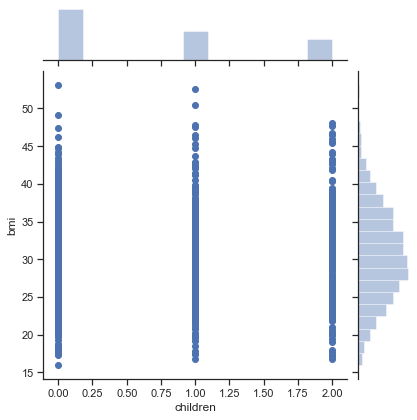

In [85]:
# Also confirming with a joinplot
# Correlation betweeen 'bmi' and 'sex' 
sns.jointplot(x=data_['children'],y=data_['bmi'])

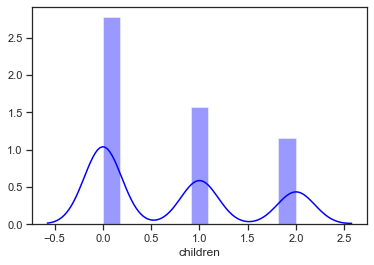

In [87]:
sns.distplot( data_["children"] , color="blue")

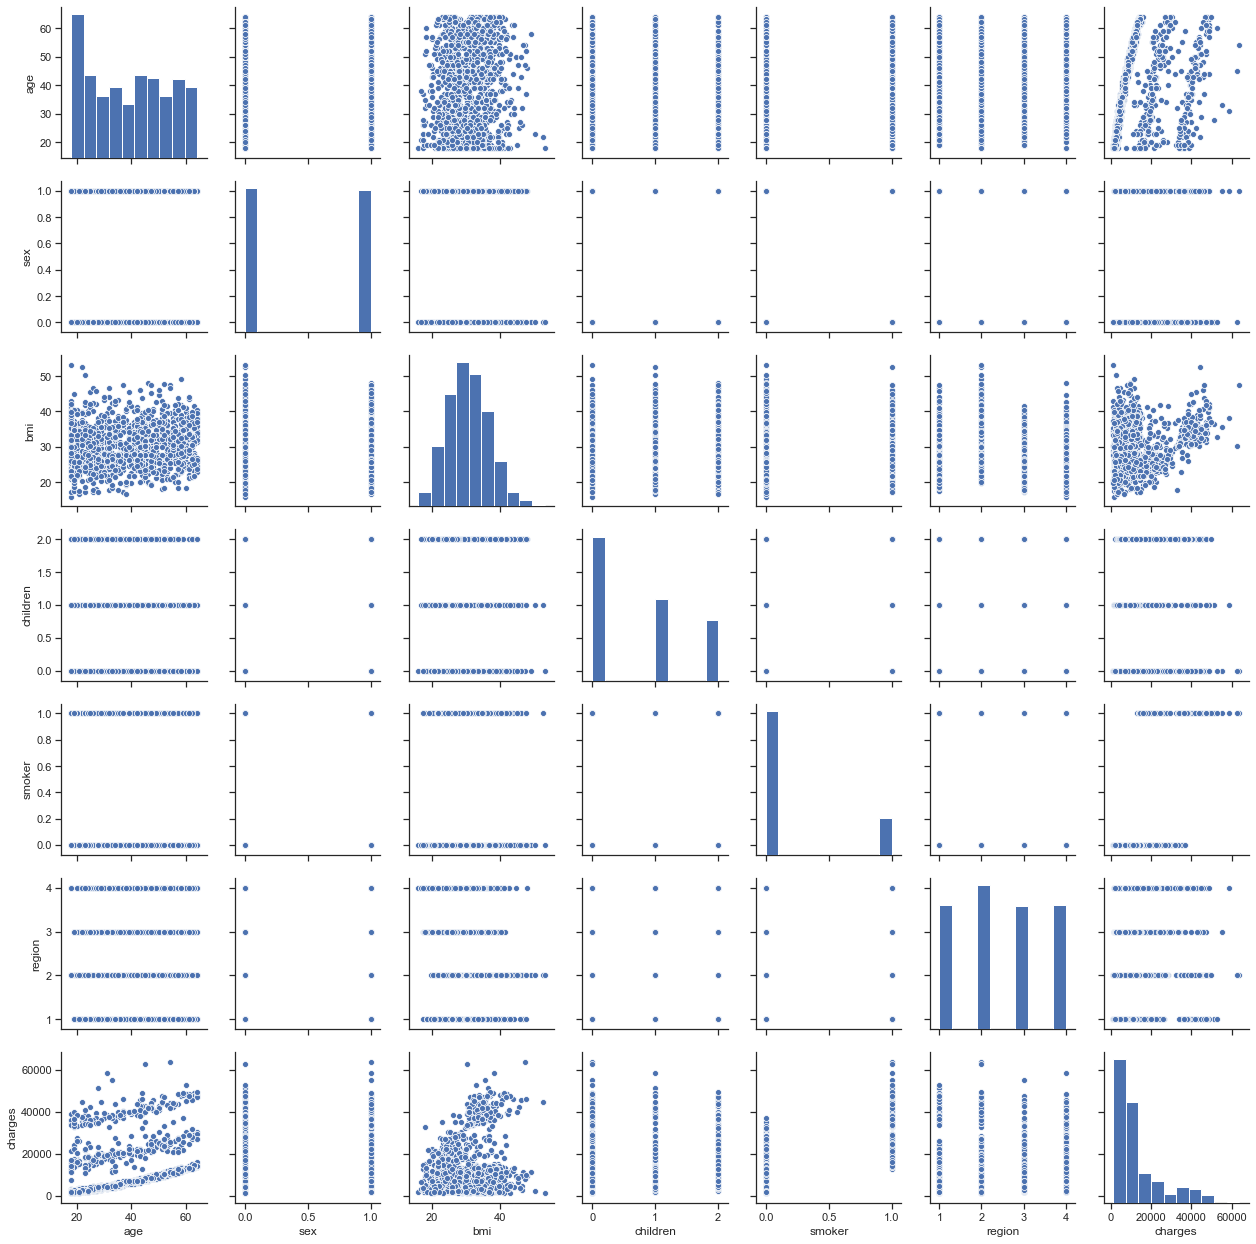

In [88]:
sns.pairplot(data_)

It is clearly seen from the above scatter plot as well as the distplot and the pairplot that the distribution of bmi across women with no children, one child and two children are not the same. We therefore fail to accept our null hypothesis.